# Chapter 7 - Example 1

In [ ]:
# Chapter 7 - Example 1
import torch
import torch.nn as nn # library for predefined NN classes
# assure reproductibility
torch.manual_seed(0)
class neuron(nn.Module):
  def __init__(self, x_size=28*28, h_channels=10):
      super(neuron,self).__init__()
      # hidden nodes in each layer
      self.x_size = x_size
      self.h_channels = h_channels
      # This is the 1st hidden layer (784 -> hidden_1)
      self.a = nn.Linear(self.x_size, self.h_channels)
      self.g = nn.ReLU(inplace=False)
      # Inplace in the code explains how the function
      # should treat the input. Inplace as true replaces
      # the input to output in the memory. Though this helps
      #  in memory usage, this creates problems for the code
      # being used as the input is always getting replaced as
      # output. It is better to set in place to false as this
      # helps to store input and output as separate storage
      # spaces  in  the  memory.
      # The  dropout  layer  (p=0.2)
      self.droput  =  nn.Dropout(0.2)
  def  forward(self,x):
        #  flattening  the  input  image
        x  =  x.view(-1,self.x_size)
        #  adding  the  hidden  layer,  for  activation  we  are  using  relu  activation
        ho  =  self.droput(self.g1(self.a1(x)))
        return  ho
x_size  =  28*28
y_size  =  10
h_theta  =  neuron(x_size, y_size)

# Chapter 7 - Example 2

In [ ]:
# Chapter 7 - Example 2
import torch
import torch.nn as nn # library for predefined NN classes
# assure reproductibility
torch.manual_seed(0)
class MLP(nn.Module):
    def __init__(self, x_size=28*28, y_size=10):
        super(MLP,self).__init__()
        # hidden nodes in each layer
        self.x_size = x_size
        self.y_size = y_size
        self.hn_1 = 512
        self.hn_2 = 512

        # This is the 1st hidden layer (784 -> hidden_1)
        self.a1 = nn.Linear(self.x_size, self.hn_1)
        self.g1 = nn.ReLU(inplace=False)
        # Inplace in the code explains how the function
        # should treat the input. Inplace as true replaces
        # the input to output in the memory. Though this helps
        #  in memory usage, this creates problems for the code
        # being used as the input is always getting replaced as
        # output. It is better to set in place to false as this
        # helps to store input and output as separate storage
        # spaces in the memory.

        ## This is also linear layer but (n_hidden -> hidden_2)
        self.a2 = nn.Linear(self.hn_1, self.hn_2)
        self.g2 = nn.ReLU(inplace=False)

        # This is the linear output layer with (n_hidden -> 10)
        self.ao = nn.Linear(self.hn_2, self.y_size)

        # The dropout layer (p=0.2)
        self.droput = nn.Dropout(0.2)

    def forward(self,x):
      # flattening the input image
      x = x.view(-1,self.x_size)

      # adding the hidden layer, for activation we are using relu activation
      h1 = self.droput(self.g1(self.a1(x)))

      # adding the hidden layer, for activation we are using relu activation
      h2 = self.droput(self.g1(self.a1(h1)))

      # adding the output layer
      ho = self.a3(h2)

      return ho

x_size = 28*28
y_size = 10
h_theta = MLP(x_size, y_size)

# Chapter 7 - Example 3

In [ ]:
# Chapter 7 - Example 3
import torch
import torchvision
from torchvision.transforms import ToTensor
from PIL import Image

# parse image
with Image.open('./geology.tiff') as image:
    # convert image to RGB
    image=image.convert("RGB")

# convert image to tensor
X = ToTensor()(image).unsqueeze(0)
print(X.size)

<built-in method size of Tensor object at 0x7efc69822700>


# Chapter 7 - Example 4

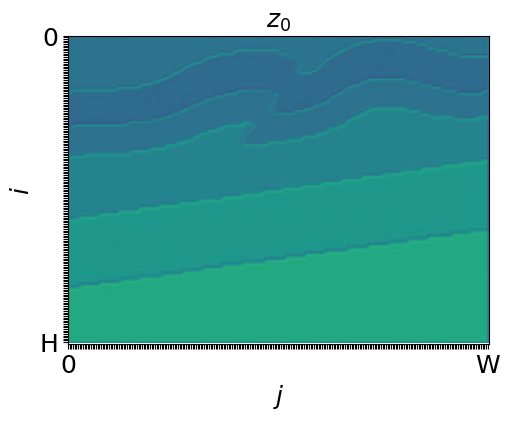

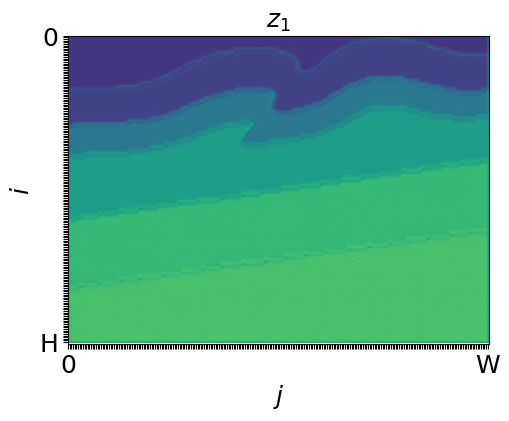

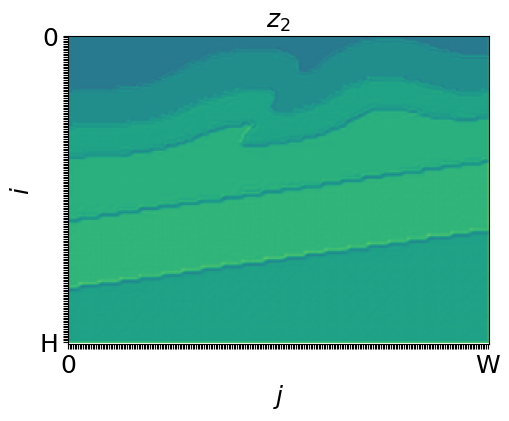

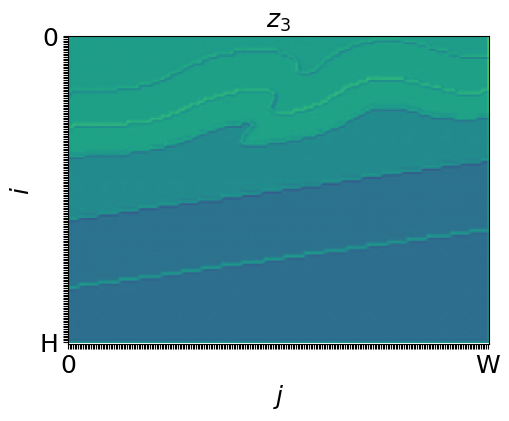

In [ ]:
# Chapter 7 - Example 4
import torch
# assure reproductibility
torch.manual_seed(0)

# Create convolutional feature maps
Nc = 4 # number of output channels
pW = 1 # zero-pad along W
pH = 1 # zero-pad along H
kW = 3 # kernel-size along W
kH = 3 # kernel-size along H
sW = 1 # stride along W
sH = 1 # stride along H
dW = 1 # dilation along W
dH = 1 # dilation along W
p = (pW, pH)
k = (kW, kH)
s = (sW, sH)
d = (dW, dH)
cnn = torch.nn.Sequential(
      torch.nn.Conv2d(in_channels=3, out_channels=Nc,
                      kernel_size=k,
                      stride=s,
                      padding=p),
      torch.nn.Tanh()
      )
# compute feature maps
z = cnn(X).detach().cpu().numpy() # feature maps in numpy format

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
# Define color map
rainbow_cmap = matplotlib.colormaps['viridis'].resampled(1000)

# loop over the output channels (feature maps)
for c in range(Nc):
  zc = z[0,c,:,:] # c-th feature map

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,4))

  # plot image
  ax.imshow(zc, vmin=-1.0, vmax=1.0, cmap= rainbow_cmap)

  # set axes
  ax.set_xticks(range(0,image.size[0]),
                minor=False)
  ax.set_yticks(range(0,image.size[1]),
                minor=False)
  ax.set_xticklabels([r"0"]+
      ['' for _ in range(1,image.size[0]-1)]+
      [r"W"], fontsize=18)
  ax.set_yticklabels([r"0"]+
      ['' for _ in range(1,image.size[1]-1)]+
      [r"H"], fontsize=18)
  ax.set_xlabel(r"$j$", fontsize=18)
  ax.set_ylabel(r"$i$", fontsize=18)
  ax.set_xlim(0,image.size[0])
  ax.set_ylim(image.size[1],0)
  ax.set_title(r"$z_{{{:>d}}}$".format(c), fontsize=18)

  # save figure
  fig.savefig("tsuda_geology_z{}_k{}{}_s{}{}.png".format(c,
                                                         kW,
                                                         kH,
                                                         sW,
                                                         sH),
              dpi=300,
              bbox_inches="tight")

# Chapter 7 - Example 5

In [ ]:
# Chapter 7 - Example 5
import torch
# assure reproductibility
torch.manual_seed(0)

# Create convolutional feature maps
Nc = 4 # number of output channels
pW = 1 # zero-pad along W
pH = 1 # zero-pad along H
kW = 3 # kernel-size along W
kH = 3 # kernel-size along H
sW = 1 # stride along W
sH = 1 # stride along H
dW = 1 # dilation along W
dH = 1 # dilation along W
p = (pW, pH)
k = (kW, kH)
s = (sW, sH)
d = (dW, dH)
# average pooling
avgpool = torch.nn.Sequential(
      torch.nn.AvgPool2d(kernel_size=k,
                         stride=s,
                         padding=p),
      torch.nn.Tanh()
      )
# compute average-pooling feature maps
z_ap = avgpool(X).detach().cpu().numpy() # feature maps in numpy format

# max-pooling
avgpool = torch.nn.Sequential(
      torch.nn.MaxPool2d(kernel_size=k,
                         stride=s,
                         padding=p),
      torch.nn.Tanh()
      )
# compute average-pooling feature maps
z_mp = avgpool(X).detach().cpu().numpy() # feature maps in numpy format

# Chapter 7 - Example 6

In [ ]:
# Chapter 7 - Example 6
# Source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# assure reproductibility
torch.manual_seed(0)
# define CNN class as subclass of the master nn.Module
# Once initialized, the forward function must be customized
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 3,
                               out_channels = 6,
                               kernel_size = (5,5),
                               stride = (1,1)
                               )

        self.pool = nn.MaxPool2d(kernel_size = 2,
                                 stride = 2)

        self.conv2 = nn.Conv2d(in_channels = 6,
                               out_channels = 16,
                               kernel_size = (5,5),
                               stride = (1,1)
                               )
        self.a1 = nn.Linear(in_features = 16 * 5 * 5,
                            out_features = 120)
        self.a2 = nn.Linear(in_features = 120,
                            out_features = 84)
        self.a3 = nn.Linear(in_features = 84,
                            out_features = 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # conv+relu+pool (1)
        x = self.pool(F.relu(self.conv2(x)))  # conv+relu+pool (2)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.a1(x)) # linear+relu (1)
        x = F.relu(self.a2(x)) # linear+relu (2)
        x = self.a3(x) # final output layer
        return x


h_theta = CNN()

# Define loss function
l = nn.CrossEntropyLoss()

# Define SGD optimizer
optimizer = optim.SGD(h_theta.parameters(), lr=0.001, momentum=0.9)

100%|██████████| 170498071/170498071 [00:01<00:00, 95814310.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
deer  frog  truck cat  


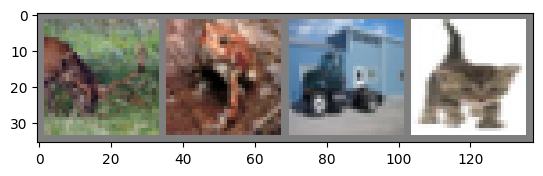

In [ ]:
# Create dataset
# Source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define pre-processing operations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

batch_size = 4

# Define train dataset (pre-processing)
Dxy_train = torchvision.datasets.CIFAR10(root='./data',
                                         train=True,
                                         download=True,
                                         transform=transform)
# Define train data loader
Dxy_train = torch.utils.data.DataLoader(Dxy_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        num_workers=2)

# Define test dataset (pre-processing)
Dxy_test = torchvision.datasets.CIFAR10(root='./data',
                                        train=False,
                                        download=True,
                                        transform=transform)
# Define test data loader
Dxy_test = torch.utils.data.DataLoader(Dxy_test,
                                       batch_size=batch_size,
                                       shuffle=False,
                                       num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')

# functions to plot an image sample
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy() # transform to numpy format
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.savefig("CIFAR10_sample.png", dpi=300, bbox_inches="tight")


# get some random training images
dataiter = iter(Dxy_train)
Xi, yi = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(Xi))
# print labels
print(' '.join(f'{classes[yi[j]]:5s}' for j in range(batch_size)))

In [ ]:
# Train

# Source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
n_e = 100
for epoch in range(n_e):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, batch in enumerate(Dxy_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        Xi, yi = batch

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        h_theta_Xi = h_theta(Xi)
        loss = l(h_theta_Xi, yi)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
# save NN for future use (inference, fine tuning, ...)
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Test on test data

dataiter = iter(Dxy_test)
Xi, yi = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(Xi))
print('GroundTruth: ', ' '.join(f'{classes[yi[j]]:5s}' for j in range(4)))

[1,  2000] loss: 2.211
[1,  4000] loss: 1.872


KeyboardInterrupt: ignored

# Chapter 7 - Example 7

In [ ]:
# Chapter 7 - Example 7
import torch
# assure reproductibility
torch.manual_seed(0)
# design a 2 layer RNN with 50 hidden states (the size of h_t)
d_X = 1 # dimension of the input time history x[t] (in R^1)
N_l = 2 # number of hidden layers
d_h = 50 # dimension of h_t (in R^50)
gactivation = 'tanh' # activation function
bidirectional =False # switch to 'True' for designing a BRNN
bias = True # switch to False if no bias is foreseen
h_theta = torch.nn.RNN(input_size = d_X,
                       hidden_size = d_h,
                       num_layers = N_l,
                       nonlinearity=gactivation,
                       bias=bias,
                       bidirectional=bidirectional)

# Chapter 7 - Example 8

In [ ]:
# Chapter 7 - Example 8
import torch
# assure reproductibility
torch.manual_seed(0)
# design a 2 layer LSTM with 50 hidden states (the size of h_t)
d_X = 1 # dimension of the input time history x[t] (in R^1)
N_l = 2 # number of hidden layers
d_h = 50 # dimension of h_t (in R^50)
gactivation = 'tanh' # activation function
bidirectional =False # switch to 'True' for designing a BRNN
bias = True # switch to False if no bias is foreseen
h_theta = torch.nn.LSTM(input_size = d_X,
                        hidden_size = d_h,
                        num_layers = N_l,
                        nonlinearity=gactivation,
                        bias=bias,
                        bidirectional=bidirectional)

# Chapter 7 - Example 9

In [ ]:
# Chapter 7 - Example 9
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt
# assure reproductibility
torch.manual_seed(0)
# Data for regression problem
A = 10.1542550
b = 14.7351129
c = 2.34
epsilon = 10.154988
N = 200 # number i.i.d. samples
Nb = 10 # number of samples in the mini-batch
# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
y = b + A * np.exp(c*x) + epsilon * np.random.randn(N, 1)

# Shuffled indices
idx = np.arange(N)
np.random.shuffle(idx)

Ntrain = int(N*0.8)
# Uses first 80% of the dataset for training
train_idx = idx[:Ntrain]
# Uses the last 20% for validation
val_idx = idx[Ntrain:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Convert Numpy arrays into PyTorch Tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Plot the dataset
# plt.scatter(x,y,color='black',label=r"$D_{XZ}$")
# plt.scatter(x[train_idx],
#             y[train_idx],
#             color='red',
#             marker="+",
#             label="train dataset")
# plt.scatter(x[val_idx],
#             y[val_idx],
#             color='blue',
#             marker="x",
#             label="validation dataset")
# plt.xlabel(r"$x$")
# plt.ylabel(r"$y$")
# plt.legend(frameon=False)

eta = 1e-1 # constant learning rate
# for warmup: https://github.com/Tony-Y/pytorch_warmup
n_e = 1000 # number of epochs

# Creating a MLP model with 1 layer and 1 neuron
h_theta = nn.Sequential(nn.Linear(1, 1), nn.SiLU())

# Define the SGD optimizer
optimizer = optim.SGD(h_theta.parameters(), lr=eta)
L_Dxy = nn.MSELoss()

# Loop over the training epochs on training dataset
i=0
while i < n_e: # loop over epochs
  for j in range(0,int(Ntrain/Nb)): # loop over mini-batches
    t_idx = np.arange(j*Nb,(j+1)*Nb,1) # mini-batch linear indexing
    np.random.shuffle(t_idx) # shuffle mini-batch
    x_b = x_train_tensor[t_idx]
    y_b = y_train_tensor[t_idx]
    optimizer.zero_grad() # initialize the optimizer
    loss = 0.0 # initialize the loss
    for t in range(Nb): # loop over the samples in the batch
      xt = x_b[t]
      yt = y_b[t]
      yhat = h_theta(xt) # predict the output
      loss += L_Dxy(yhat, yt) # Compute Empirical Loss
    loss.backward() # Compute derivatives with AutoGrad
    optimizer.step() # weight update!

KeyboardInterrupt: ignored

# Chapter 7 - Example 10


In [ ]:
# Chapter 7 - Example 10
import torch.optim as optim
# assure reproductibility
torch.manual_seed(0)
# Define the SGD optimizer
gamma = 0.5/eta # Classical Momentum algorithm
# PyTorch adopts a Classical Momentum coefficient eta*mu
# which corresponds to gamma in the above mentioned formulas
tau = 0.0 # Dampening coefficient
optimizer = optim.SGD(h_theta.parameters(), lr=eta,
	momentum=gamma, dampening=tau)

# Chapter 7 - Example 11

In [ ]:
# Chapter 7 - Example 11
import torch.optim as optim
# assure reproductibility
torch.manual_seed(0)
# Define the SGD optimizer
gamma = 0.9 # Nesterov momentum coefficient
tau = 0.0 # Dampening coefficient
optimizer = optim.SGD(h_theta.parameters(), lr=eta,
	nesterov=True, momentum=gamma)

# Chapter 7 - Example 12

In [ ]:
# Chapter 7 - Example 12
import torch.optim as optim
# assure reproductibility
torch.manual_seed(0)
# Define the AdaGrad optimizer
etad = 0.0 # learning rate decay
epsilon = 1e-8 # tolerance
G0 = 0.0
optimizer = optim.Adagrad(h_theta.parameters(), lr=eta,
			lr_decay=etad, eps=epsilon, initial_accumulator_value=G0)

# Chapter 7 - Example 13

In [ ]:
# Chapter 7 - Example 13
import torch.optim as optim
# assure reproductibility
torch.manual_seed(0)
# Define the RMSprop optimizer
alphar = 0.9 # smoothing constant (called alpha in PyTorch)
epsilon = 1e-8 # tolerance
G0 = 0.0
optimizer = optim.RMSprop(h_theta.parameters(), lr=eta,
			alpha=alphar, eps=epsilon)

# Chapter 7 - Example 14

In [ ]:
# Chapter 7 - Example 14
import torch.optim as optim
# assure reproductibility
torch.manual_seed(0)
# Define the ADADELTA optimizer
alphau = 0.9 # smoothing constant (called rho in PyTorch)
epsilon = 1e-8 # tolerance
optimizer = optim.Adadelta(h_theta.parameters(), lr=eta,
			rho=alphau, eps=epsilon)

# Chapter 7 - Example 15

In [ ]:
# Chapter 7 - Example 15
import torch.optim as optim
# assure reproductibility
torch.manual_seed(0)
# Define the SGD optimizer
beta1 = 0.9 # Adam coefficients
beta2 = 0.999 # Adam coefficients
epsilon = 1e-8 # tolerance
optimizer = optim.Adam(h_theta.parameters(), lr=eta,
			betas=(beta1, beta2), eps=epsilon)

# Chapter 7 - Example 17

In [ ]:
# Chapter 7 - Example 17
import numpy as np
import torch
# assure reproductibility
torch.manual_seed(0)
# Data for regression problem
A = 10.1542550
b = 14.7351129
epsilon = 0.1
N = 200 # number i.i.d. samples

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
y = b + A * np.exp(x) + epsilon * np.random.randn(N, 1)

# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*0.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*0.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Convert Numpy arrays into PyTorch Tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

alpha = 1e-1 # learning rate
n_epochs = 1000 # number of epochs

# initialize weights and bias
w = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

for epoch in range(n_epochs):
    yhat = b + w * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # Perform autodiff!
    loss.backward()

    print(w.grad)
    print(b.grad)

    # We need to use NO_GRAD to manually update the gradients
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    # Drop the old gradients
    w.grad.zero_()
    b.grad.zero_()

print(A, b)

tensor([-33.2828])
tensor([-63.0339])
tensor([-25.0295])
tensor([-47.2090])
tensor([-18.8416])
tensor([-35.3470])
tensor([-14.2020])
tensor([-26.4558])
tensor([-10.7229])
tensor([-19.7914])
tensor([-8.1138])
tensor([-14.7963])
tensor([-6.1570])
tensor([-11.0525])
tensor([-4.6890])
tensor([-8.2467])
tensor([-3.5875])
tensor([-6.1440])
tensor([-2.7608])
tensor([-4.5683])
tensor([-2.1400])
tensor([-3.3877])
tensor([-1.6737])
tensor([-2.5032])
tensor([-1.3231])
tensor([-1.8407])
tensor([-1.0593])
tensor([-1.3447])
tensor([-0.8606])
tensor([-0.9733])
tensor([-0.7107])
tensor([-0.6954])
tensor([-0.5974])
tensor([-0.4876])
tensor([-0.5115])
tensor([-0.3323])
tensor([-0.4462])
tensor([-0.2164])
tensor([-0.3963])
tensor([-0.1300])
tensor([-0.3580])
tensor([-0.0657])
tensor([-0.3285])
tensor([-0.0179])
tensor([-0.3054])
tensor([0.0174])
tensor([-0.2873])
tensor([0.0435])
tensor([-0.2729])
tensor([0.0626])
tensor([-0.2612])
tensor([0.0764])
tensor([-0.2517])
tensor([0.0864])
tensor([-0.2437])
ten

NameError: ignored

# Chapter 7 - Example 18

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=8b15ccd5babf7a245d04aa6b5f5c33113108f8bc43f8f9a85332a1a424c74899
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


Epoch 0: 100%|██████████| 21/21 [00:00<00:00, 204.80batch/s, acc=0.2, loss=1.29]


Epoch 0 validation: Cross-entropy=1.25, Accuracy=44.4%


Epoch 1: 100%|██████████| 21/21 [00:00<00:00, 247.00batch/s, acc=0.2, loss=1.23]


Epoch 1 validation: Cross-entropy=1.21, Accuracy=35.6%


Epoch 2: 100%|██████████| 21/21 [00:00<00:00, 248.87batch/s, acc=0, loss=1.17]


Epoch 2 validation: Cross-entropy=1.17, Accuracy=26.7%


Epoch 3: 100%|██████████| 21/21 [00:00<00:00, 241.61batch/s, acc=0.4, loss=1.11]


Epoch 3 validation: Cross-entropy=1.13, Accuracy=20.0%


Epoch 4: 100%|██████████| 21/21 [00:00<00:00, 258.65batch/s, acc=0.4, loss=1.05]


Epoch 4 validation: Cross-entropy=1.07, Accuracy=22.2%


Epoch 5: 100%|██████████| 21/21 [00:00<00:00, 254.20batch/s, acc=0.4, loss=0.995]


Epoch 5 validation: Cross-entropy=1.03, Accuracy=22.2%


Epoch 6: 100%|██████████| 21/21 [00:00<00:00, 253.99batch/s, acc=0.6, loss=0.955]


Epoch 6 validation: Cross-entropy=1.00, Accuracy=26.7%


Epoch 7: 100%|██████████| 21/21 [00:00<00:00, 223.75batch/s, acc=0.8, loss=0.925]


Epoch 7 validation: Cross-entropy=0.97, Accuracy=51.1%


Epoch 8: 100%|██████████| 21/21 [00:00<00:00, 111.52batch/s, acc=0.8, loss=0.896]


Epoch 8 validation: Cross-entropy=0.95, Accuracy=57.8%


Epoch 9: 100%|██████████| 21/21 [00:00<00:00, 238.88batch/s, acc=0.8, loss=0.869]


Epoch 9 validation: Cross-entropy=0.93, Accuracy=60.0%


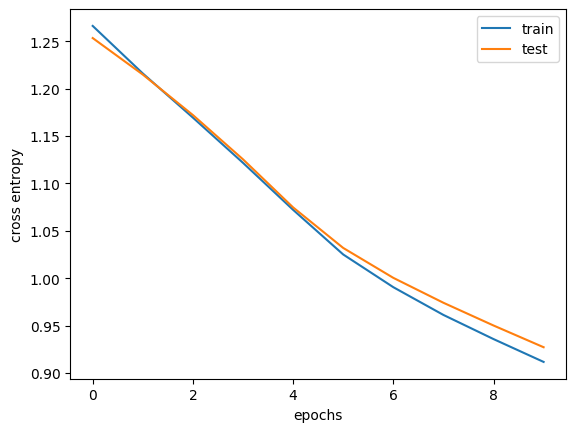

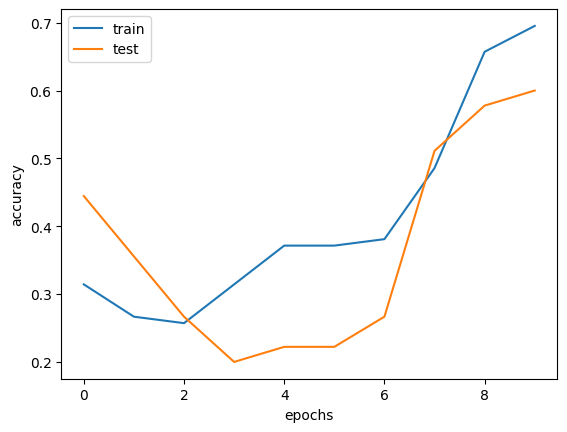

In [ ]:
# Chapter 7 - Example 18
# Source:
# https://machinelearningmastery.com/building-a-multiclass-classification-model-in-pytorch/
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import copy
# uncomment the next line to install torchviz if necessary
! pip install torchviz
from torchviz import make_dot

# To assure reproductibility, fix the random seed
torch.manual_seed(0) # to assure reproductibility
np.random.seed(0) # to assure reproductibility

# Download and parse the IRIS dataset (from the UCI Machine Learning repository)
# This dataset was conceived by Sir Ronald Fisher and it is among the best-known
# dataset for pattern recognition
data_url= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
data = pd.read_csv(data_url, header=None)
X = data.iloc[:, 0:4]
y = data.iloc[:, 4:]

# The IRIS dataset is composed of the three class labels:
# 1. Iris-setosa
# 2. Iris-versicolor
# 3. Iris-virginica
# apply one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
y = ohe.transform(y)

# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# define the MLP sequentially with torch.nn
h_theta = nn.Sequential()
# first hidden layer pre-activation a^(1)
h_theta.add_module('a1', nn.Linear(4, 8))
# first hidden layer activation function g^(1)
h_theta.add_module('g1', nn.ReLU())
# second hidden layer pre-activation a^2
h_theta.add_module('a2', nn.Linear(8, 3))

# define the loss function
loss_fn = nn.CrossEntropyLoss() # loss function
optimizer = optim.Adam(h_theta.parameters(), lr=0.001) # optimizer

# prepare model and training parameters
n_epochs = 10 # number of training epochs
batch_size = 5 # size of the mini batch
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
# track loss history
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop over the epochs
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode
    h_theta.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred = h_theta(X_batch)
            # compute the loss
            loss = loss_fn(y_pred, y_batch)
            # reset previously saved gradients and empty the optimizer memory
            optimizer.zero_grad()
            # run backward propagation
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta.eval()
    # infer the class over the test set
    y_pred = h_theta(X_test)
    ce = loss_fn(y_pred, y_test)


    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(h_theta.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# plot computational graph with torchviz
h_theta.eval()
y_pred = h_theta(X_test)
ce = loss_fn(y_pred, y_test)
make_dot(y_pred, params=dict(h_theta.named_parameters()),
 show_attrs=True, show_saved=True).render("classifier_graph", format="png")
make_dot(ce, params=dict(h_theta.named_parameters()),
 show_attrs=True, show_saved=True).render("loss_graph", format="png")



# Restore best model
h_theta.load_state_dict(best_weights)

# Plot the loss and accuracy for train and test sets
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Chapter 7 - Example 19

Epoch 0: 100%|██████████| 21/21 [00:00<00:00, 100.49batch/s, acc=0.4, loss=1.13]


Epoch 0 validation: Cross-entropy=1.17, Accuracy=24.4%


Epoch 1: 100%|██████████| 21/21 [00:00<00:00, 115.14batch/s, acc=0.4, loss=1.12]


Epoch 1 validation: Cross-entropy=1.16, Accuracy=24.4%


Epoch 2: 100%|██████████| 21/21 [00:00<00:00, 103.23batch/s, acc=0.4, loss=1.12]


Epoch 2 validation: Cross-entropy=1.15, Accuracy=24.4%


Epoch 3: 100%|██████████| 21/21 [00:00<00:00, 104.96batch/s, acc=0.4, loss=1.11]


Epoch 3 validation: Cross-entropy=1.15, Accuracy=24.4%


Epoch 4: 100%|██████████| 21/21 [00:00<00:00, 103.47batch/s, acc=0.4, loss=1.11]


Epoch 4 validation: Cross-entropy=1.14, Accuracy=24.4%


Epoch 5: 100%|██████████| 21/21 [00:00<00:00, 108.94batch/s, acc=0.4, loss=1.1]


Epoch 5 validation: Cross-entropy=1.14, Accuracy=24.4%


Epoch 6: 100%|██████████| 21/21 [00:00<00:00, 105.28batch/s, acc=0.4, loss=1.1]


Epoch 6 validation: Cross-entropy=1.13, Accuracy=24.4%


Epoch 7: 100%|██████████| 21/21 [00:00<00:00, 110.58batch/s, acc=0.4, loss=1.1]


Epoch 7 validation: Cross-entropy=1.13, Accuracy=24.4%


Epoch 8: 100%|██████████| 21/21 [00:00<00:00, 112.65batch/s, acc=0.4, loss=1.09]


Epoch 8 validation: Cross-entropy=1.12, Accuracy=24.4%


Epoch 9: 100%|██████████| 21/21 [00:00<00:00, 107.49batch/s, acc=0.4, loss=1.07]


Epoch 9 validation: Cross-entropy=1.11, Accuracy=24.4%


Epoch 10: 100%|██████████| 21/21 [00:00<00:00, 106.52batch/s, acc=0.4, loss=1.04]


Epoch 10 validation: Cross-entropy=1.08, Accuracy=24.4%


Epoch 11: 100%|██████████| 21/21 [00:00<00:00, 115.42batch/s, acc=0.8, loss=0.981]


Epoch 11 validation: Cross-entropy=1.03, Accuracy=60.0%


Epoch 12: 100%|██████████| 21/21 [00:00<00:00, 113.89batch/s, acc=0.8, loss=0.884]


Epoch 12 validation: Cross-entropy=0.94, Accuracy=60.0%


Epoch 13: 100%|██████████| 21/21 [00:00<00:00, 109.97batch/s, acc=0.8, loss=0.766]


Epoch 13 validation: Cross-entropy=0.84, Accuracy=60.0%


Epoch 14: 100%|██████████| 21/21 [00:00<00:00, 106.43batch/s, acc=0.8, loss=0.661]


Epoch 14 validation: Cross-entropy=0.74, Accuracy=60.0%


Epoch 15: 100%|██████████| 21/21 [00:00<00:00, 104.21batch/s, acc=0.8, loss=0.588]


Epoch 15 validation: Cross-entropy=0.67, Accuracy=60.0%


Epoch 16: 100%|██████████| 21/21 [00:00<00:00, 115.57batch/s, acc=0.8, loss=0.542]


Epoch 16 validation: Cross-entropy=0.63, Accuracy=60.0%


Epoch 17: 100%|██████████| 21/21 [00:00<00:00, 110.14batch/s, acc=0.8, loss=0.513]


Epoch 17 validation: Cross-entropy=0.59, Accuracy=60.0%


Epoch 18: 100%|██████████| 21/21 [00:00<00:00, 111.13batch/s, acc=0.8, loss=0.493]


Epoch 18 validation: Cross-entropy=0.57, Accuracy=60.0%


Epoch 19: 100%|██████████| 21/21 [00:00<00:00, 109.68batch/s, acc=0.8, loss=0.479]


Epoch 19 validation: Cross-entropy=0.56, Accuracy=60.0%


Epoch 20: 100%|██████████| 21/21 [00:00<00:00, 101.52batch/s, acc=0.8, loss=0.469]


Epoch 20 validation: Cross-entropy=0.54, Accuracy=60.0%


Epoch 21: 100%|██████████| 21/21 [00:00<00:00, 108.15batch/s, acc=0.8, loss=0.461]


Epoch 21 validation: Cross-entropy=0.53, Accuracy=60.0%


Epoch 22: 100%|██████████| 21/21 [00:00<00:00, 111.29batch/s, acc=0.8, loss=0.455]


Epoch 22 validation: Cross-entropy=0.53, Accuracy=60.0%


Epoch 23: 100%|██████████| 21/21 [00:00<00:00, 117.05batch/s, acc=0.8, loss=0.45]


Epoch 23 validation: Cross-entropy=0.52, Accuracy=60.0%


Epoch 24: 100%|██████████| 21/21 [00:00<00:00, 101.54batch/s, acc=0.8, loss=0.445]


Epoch 24 validation: Cross-entropy=0.51, Accuracy=60.0%


Epoch 25: 100%|██████████| 21/21 [00:00<00:00, 97.78batch/s, acc=0.8, loss=0.442] 


Epoch 25 validation: Cross-entropy=0.51, Accuracy=60.0%


Epoch 26: 100%|██████████| 21/21 [00:00<00:00, 113.51batch/s, acc=0.8, loss=0.438]


Epoch 26 validation: Cross-entropy=0.51, Accuracy=60.0%


Epoch 27: 100%|██████████| 21/21 [00:00<00:00, 109.32batch/s, acc=0.8, loss=0.436]

Epoch 27 validation: Cross-entropy=0.50, Accuracy=60.0%

Epoch 28: 100%|██████████| 21/21 [00:00<00:00, 108.96batch/s, acc=0.8, loss=0.433]


Epoch 28 validation: Cross-entropy=0.50, Accuracy=60.0%


Epoch 29: 100%|██████████| 21/21 [00:00<00:00, 109.67batch/s, acc=0.8, loss=0.431]


Epoch 29 validation: Cross-entropy=0.50, Accuracy=60.0%


Epoch 30: 100%|██████████| 21/21 [00:00<00:00, 97.06batch/s, acc=0.8, loss=0.429] 


Epoch 30 validation: Cross-entropy=0.50, Accuracy=60.0%


Epoch 31: 100%|██████████| 21/21 [00:00<00:00, 108.75batch/s, acc=0.8, loss=0.427]


Epoch 31 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 32: 100%|██████████| 21/21 [00:00<00:00, 107.34batch/s, acc=0.8, loss=0.426]


Epoch 32 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 33: 100%|██████████| 21/21 [00:00<00:00, 105.79batch/s, acc=0.8, loss=0.424]


Epoch 33 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 34: 100%|██████████| 21/21 [00:00<00:00, 105.91batch/s, acc=0.8, loss=0.423]


Epoch 34 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 35: 100%|██████████| 21/21 [00:00<00:00, 110.62batch/s, acc=0.8, loss=0.421]


Epoch 35 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 36: 100%|██████████| 21/21 [00:00<00:00, 108.04batch/s, acc=0.8, loss=0.42]


Epoch 36 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 37: 100%|██████████| 21/21 [00:00<00:00, 105.73batch/s, acc=0.8, loss=0.42]


Epoch 37 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 38: 100%|██████████| 21/21 [00:00<00:00, 102.57batch/s, acc=0.8, loss=0.419]


Epoch 38 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 39: 100%|██████████| 21/21 [00:00<00:00, 111.60batch/s, acc=0.8, loss=0.418]


Epoch 39 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 40: 100%|██████████| 21/21 [00:00<00:00, 95.61batch/s, acc=0.8, loss=0.418] 


Epoch 40 validation: Cross-entropy=0.49, Accuracy=60.0%


Epoch 41: 100%|██████████| 21/21 [00:00<00:00, 106.24batch/s, acc=0.8, loss=0.417]


Epoch 41 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 42: 100%|██████████| 21/21 [00:00<00:00, 108.36batch/s, acc=0.8, loss=0.416]


Epoch 42 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 43: 100%|██████████| 21/21 [00:00<00:00, 98.79batch/s, acc=0.8, loss=0.416] 


Epoch 43 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 44: 100%|██████████| 21/21 [00:00<00:00, 93.15batch/s, acc=0.8, loss=0.415] 


Epoch 44 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 45: 100%|██████████| 21/21 [00:00<00:00, 102.90batch/s, acc=0.8, loss=0.415]


Epoch 45 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 46: 100%|██████████| 21/21 [00:00<00:00, 95.73batch/s, acc=0.8, loss=0.414] 


Epoch 46 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 47: 100%|██████████| 21/21 [00:00<00:00, 101.35batch/s, acc=0.8, loss=0.414]


Epoch 47 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 48: 100%|██████████| 21/21 [00:00<00:00, 99.28batch/s, acc=0.8, loss=0.413]


Epoch 48 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 49: 100%|██████████| 21/21 [00:00<00:00, 104.16batch/s, acc=0.8, loss=0.413]


Epoch 49 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 50: 100%|██████████| 21/21 [00:00<00:00, 94.33batch/s, acc=0.8, loss=0.412]


Epoch 50 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 51: 100%|██████████| 21/21 [00:00<00:00, 95.61batch/s, acc=0.8, loss=0.412] 


Epoch 51 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 52: 100%|██████████| 21/21 [00:00<00:00, 97.63batch/s, acc=0.8, loss=0.411] 


Epoch 52 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 53: 100%|██████████| 21/21 [00:00<00:00, 106.84batch/s, acc=0.8, loss=0.411]


Epoch 53 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 54: 100%|██████████| 21/21 [00:00<00:00, 102.35batch/s, acc=0.8, loss=0.411]


Epoch 54 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 55: 100%|██████████| 21/21 [00:00<00:00, 95.75batch/s, acc=0.8, loss=0.41] 


Epoch 55 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 56: 100%|██████████| 21/21 [00:00<00:00, 111.57batch/s, acc=0.8, loss=0.41]


Epoch 56 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 57: 100%|██████████| 21/21 [00:00<00:00, 111.08batch/s, acc=0.8, loss=0.41]


Epoch 57 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 58: 100%|██████████| 21/21 [00:00<00:00, 105.18batch/s, acc=0.8, loss=0.409]


Epoch 58 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 59: 100%|██████████| 21/21 [00:00<00:00, 107.52batch/s, acc=0.8, loss=0.409]


Epoch 59 validation: Cross-entropy=0.48, Accuracy=60.0%


Epoch 60: 100%|██████████| 21/21 [00:00<00:00, 102.21batch/s, acc=0.8, loss=0.409]


Epoch 60 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 61: 100%|██████████| 21/21 [00:00<00:00, 112.83batch/s, acc=0.8, loss=0.408]


Epoch 61 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 62: 100%|██████████| 21/21 [00:00<00:00, 102.51batch/s, acc=0.8, loss=0.408]


Epoch 62 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 63: 100%|██████████| 21/21 [00:00<00:00, 99.62batch/s, acc=0.8, loss=0.408] 


Epoch 63 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 64: 100%|██████████| 21/21 [00:00<00:00, 98.36batch/s, acc=0.8, loss=0.408]


Epoch 64 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 65: 100%|██████████| 21/21 [00:00<00:00, 100.23batch/s, acc=0.8, loss=0.407]


Epoch 65 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 66: 100%|██████████| 21/21 [00:00<00:00, 107.38batch/s, acc=0.8, loss=0.407]


Epoch 66 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 67: 100%|██████████| 21/21 [00:00<00:00, 107.96batch/s, acc=0.8, loss=0.407]


Epoch 67 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 68: 100%|██████████| 21/21 [00:00<00:00, 97.71batch/s, acc=0.8, loss=0.407]


Epoch 68 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 69: 100%|██████████| 21/21 [00:00<00:00, 97.46batch/s, acc=0.8, loss=0.407]


Epoch 69 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 70: 100%|██████████| 21/21 [00:00<00:00, 104.37batch/s, acc=0.8, loss=0.406]


Epoch 70 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 71: 100%|██████████| 21/21 [00:00<00:00, 110.98batch/s, acc=0.8, loss=0.406]


Epoch 71 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 72: 100%|██████████| 21/21 [00:00<00:00, 108.72batch/s, acc=0.8, loss=0.406]


Epoch 72 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 73: 100%|██████████| 21/21 [00:00<00:00, 111.28batch/s, acc=0.8, loss=0.406]


Epoch 73 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 74: 100%|██████████| 21/21 [00:00<00:00, 110.98batch/s, acc=0.8, loss=0.406]


Epoch 74 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 75: 100%|██████████| 21/21 [00:00<00:00, 106.89batch/s, acc=0.8, loss=0.406]


Epoch 75 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 76: 100%|██████████| 21/21 [00:00<00:00, 111.56batch/s, acc=0.8, loss=0.405]


Epoch 76 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 77: 100%|██████████| 21/21 [00:00<00:00, 43.76batch/s, acc=0.8, loss=0.405]


Epoch 77 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 78: 100%|██████████| 21/21 [00:00<00:00, 27.72batch/s, acc=0.8, loss=0.405]


Epoch 78 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 79: 100%|██████████| 21/21 [00:00<00:00, 48.74batch/s, acc=0.8, loss=0.405]


Epoch 79 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 80: 100%|██████████| 21/21 [00:00<00:00, 89.62batch/s, acc=0.8, loss=0.405]


Epoch 80 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 81: 100%|██████████| 21/21 [00:00<00:00, 95.38batch/s, acc=0.8, loss=0.405]


Epoch 81 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 82: 100%|██████████| 21/21 [00:00<00:00, 100.28batch/s, acc=0.8, loss=0.405]


Epoch 82 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 83: 100%|██████████| 21/21 [00:00<00:00, 102.31batch/s, acc=0.8, loss=0.405]


Epoch 83 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 84: 100%|██████████| 21/21 [00:00<00:00, 95.84batch/s, acc=0.8, loss=0.404]


Epoch 84 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 85: 100%|██████████| 21/21 [00:00<00:00, 99.88batch/s, acc=0.8, loss=0.404]


Epoch 85 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 86: 100%|██████████| 21/21 [00:00<00:00, 87.78batch/s, acc=0.8, loss=0.404]


Epoch 86 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 87: 100%|██████████| 21/21 [00:00<00:00, 102.52batch/s, acc=0.8, loss=0.404]


Epoch 87 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 88: 100%|██████████| 21/21 [00:00<00:00, 103.76batch/s, acc=0.8, loss=0.404]


Epoch 88 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 89: 100%|██████████| 21/21 [00:00<00:00, 98.48batch/s, acc=0.8, loss=0.404]


Epoch 89 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 90: 100%|██████████| 21/21 [00:00<00:00, 63.95batch/s, acc=0.8, loss=0.404]


Epoch 90 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 91: 100%|██████████| 21/21 [00:00<00:00, 64.94batch/s, acc=0.8, loss=0.404]


Epoch 91 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 92: 100%|██████████| 21/21 [00:00<00:00, 67.09batch/s, acc=0.8, loss=0.404]


Epoch 92 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 93: 100%|██████████| 21/21 [00:00<00:00, 63.28batch/s, acc=0.8, loss=0.403]


Epoch 93 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 94: 100%|██████████| 21/21 [00:00<00:00, 61.74batch/s, acc=0.8, loss=0.403]


Epoch 94 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 95: 100%|██████████| 21/21 [00:00<00:00, 57.23batch/s, acc=0.8, loss=0.403]


Epoch 95 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 96: 100%|██████████| 21/21 [00:00<00:00, 59.83batch/s, acc=0.8, loss=0.403]


Epoch 96 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 97: 100%|██████████| 21/21 [00:00<00:00, 59.47batch/s, acc=0.8, loss=0.403]


Epoch 97 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 98: 100%|██████████| 21/21 [00:00<00:00, 69.96batch/s, acc=0.8, loss=0.403]


Epoch 98 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 99: 100%|██████████| 21/21 [00:00<00:00, 71.05batch/s, acc=0.8, loss=0.403]


Epoch 99 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 100: 100%|██████████| 21/21 [00:00<00:00, 88.01batch/s, acc=0.8, loss=0.403]


Epoch 100 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 101: 100%|██████████| 21/21 [00:00<00:00, 104.65batch/s, acc=0.8, loss=0.403]


Epoch 101 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 102: 100%|██████████| 21/21 [00:00<00:00, 101.35batch/s, acc=0.8, loss=0.403]


Epoch 102 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 103: 100%|██████████| 21/21 [00:00<00:00, 100.13batch/s, acc=0.8, loss=0.403]


Epoch 103 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 104: 100%|██████████| 21/21 [00:00<00:00, 96.64batch/s, acc=0.8, loss=0.403] 


Epoch 104 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 105: 100%|██████████| 21/21 [00:00<00:00, 99.36batch/s, acc=0.8, loss=0.403] 


Epoch 105 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 106: 100%|██████████| 21/21 [00:00<00:00, 103.47batch/s, acc=0.8, loss=0.403]


Epoch 106 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 107: 100%|██████████| 21/21 [00:00<00:00, 105.14batch/s, acc=0.8, loss=0.402]


Epoch 107 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 108: 100%|██████████| 21/21 [00:00<00:00, 111.69batch/s, acc=0.8, loss=0.402]


Epoch 108 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 109: 100%|██████████| 21/21 [00:00<00:00, 105.69batch/s, acc=0.8, loss=0.402]


Epoch 109 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 110: 100%|██████████| 21/21 [00:00<00:00, 111.26batch/s, acc=0.8, loss=0.402]


Epoch 110 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 111: 100%|██████████| 21/21 [00:00<00:00, 116.38batch/s, acc=0.8, loss=0.402]


Epoch 111 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 112: 100%|██████████| 21/21 [00:00<00:00, 100.28batch/s, acc=0.8, loss=0.402]


Epoch 112 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 113: 100%|██████████| 21/21 [00:00<00:00, 100.86batch/s, acc=0.8, loss=0.402]


Epoch 113 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 114: 100%|██████████| 21/21 [00:00<00:00, 102.18batch/s, acc=0.8, loss=0.402]


Epoch 114 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 115: 100%|██████████| 21/21 [00:00<00:00, 103.41batch/s, acc=0.8, loss=0.402]


Epoch 115 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 116: 100%|██████████| 21/21 [00:00<00:00, 108.00batch/s, acc=0.8, loss=0.402]


Epoch 116 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 117: 100%|██████████| 21/21 [00:00<00:00, 112.00batch/s, acc=0.8, loss=0.402]


Epoch 117 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 118: 100%|██████████| 21/21 [00:00<00:00, 114.59batch/s, acc=0.8, loss=0.402]


Epoch 118 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 119: 100%|██████████| 21/21 [00:00<00:00, 108.98batch/s, acc=0.8, loss=0.402]

Epoch 119 validation: Cross-entropy=0.47, Accuracy=60.0%

Epoch 120: 100%|██████████| 21/21 [00:00<00:00, 115.81batch/s, acc=0.8, loss=0.402]


Epoch 120 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 121: 100%|██████████| 21/21 [00:00<00:00, 111.46batch/s, acc=0.8, loss=0.402]


Epoch 121 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 122: 100%|██████████| 21/21 [00:00<00:00, 105.45batch/s, acc=0.8, loss=0.402]


Epoch 122 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 123: 100%|██████████| 21/21 [00:00<00:00, 111.75batch/s, acc=0.8, loss=0.402]


Epoch 123 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 124: 100%|██████████| 21/21 [00:00<00:00, 113.99batch/s, acc=0.8, loss=0.402]


Epoch 124 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 125: 100%|██████████| 21/21 [00:00<00:00, 108.91batch/s, acc=0.8, loss=0.402]


Epoch 125 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 126: 100%|██████████| 21/21 [00:00<00:00, 103.09batch/s, acc=0.8, loss=0.401]


Epoch 126 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 127: 100%|██████████| 21/21 [00:00<00:00, 115.91batch/s, acc=0.8, loss=0.401]


Epoch 127 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 128: 100%|██████████| 21/21 [00:00<00:00, 94.94batch/s, acc=0.8, loss=0.401]


Epoch 128 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 129: 100%|██████████| 21/21 [00:00<00:00, 100.06batch/s, acc=0.8, loss=0.401]


Epoch 129 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 130: 100%|██████████| 21/21 [00:00<00:00, 107.17batch/s, acc=0.8, loss=0.401]


Epoch 130 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 131: 100%|██████████| 21/21 [00:00<00:00, 102.72batch/s, acc=0.8, loss=0.401]


Epoch 131 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 132: 100%|██████████| 21/21 [00:00<00:00, 99.97batch/s, acc=0.8, loss=0.401] 


Epoch 132 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 133: 100%|██████████| 21/21 [00:00<00:00, 93.68batch/s, acc=0.8, loss=0.401] 


Epoch 133 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 134: 100%|██████████| 21/21 [00:00<00:00, 108.64batch/s, acc=0.8, loss=0.401]


Epoch 134 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 135: 100%|██████████| 21/21 [00:00<00:00, 112.00batch/s, acc=0.8, loss=0.401]


Epoch 135 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 136: 100%|██████████| 21/21 [00:00<00:00, 87.16batch/s, acc=0.8, loss=0.401]


Epoch 136 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 137: 100%|██████████| 21/21 [00:00<00:00, 80.55batch/s, acc=0.8, loss=0.401]


Epoch 137 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 138: 100%|██████████| 21/21 [00:00<00:00, 92.96batch/s, acc=0.8, loss=0.401] 


Epoch 138 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 139: 100%|██████████| 21/21 [00:00<00:00, 105.55batch/s, acc=0.8, loss=0.401]


Epoch 139 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 140: 100%|██████████| 21/21 [00:00<00:00, 107.98batch/s, acc=0.8, loss=0.401]


Epoch 140 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 141: 100%|██████████| 21/21 [00:00<00:00, 112.19batch/s, acc=0.8, loss=0.401]


Epoch 141 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 142: 100%|██████████| 21/21 [00:00<00:00, 105.77batch/s, acc=0.8, loss=0.401]


Epoch 142 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 143: 100%|██████████| 21/21 [00:00<00:00, 114.45batch/s, acc=0.8, loss=0.401]


Epoch 143 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 144: 100%|██████████| 21/21 [00:00<00:00, 109.88batch/s, acc=0.8, loss=0.401]

Epoch 144 validation: Cross-entropy=0.47, Accuracy=60.0%

Epoch 145: 100%|██████████| 21/21 [00:00<00:00, 109.23batch/s, acc=0.8, loss=0.401]


Epoch 145 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 146: 100%|██████████| 21/21 [00:00<00:00, 107.99batch/s, acc=0.8, loss=0.401]


Epoch 146 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 147: 100%|██████████| 21/21 [00:00<00:00, 110.79batch/s, acc=0.8, loss=0.401]


Epoch 147 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 148: 100%|██████████| 21/21 [00:00<00:00, 106.13batch/s, acc=0.8, loss=0.401]


Epoch 148 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 149: 100%|██████████| 21/21 [00:00<00:00, 108.45batch/s, acc=0.8, loss=0.401]


Epoch 149 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 150: 100%|██████████| 21/21 [00:00<00:00, 106.78batch/s, acc=0.8, loss=0.401]


Epoch 150 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 151: 100%|██████████| 21/21 [00:00<00:00, 110.50batch/s, acc=0.8, loss=0.401]


Epoch 151 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 152: 100%|██████████| 21/21 [00:00<00:00, 112.56batch/s, acc=0.8, loss=0.401]


Epoch 152 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 153: 100%|██████████| 21/21 [00:00<00:00, 107.72batch/s, acc=0.8, loss=0.401]


Epoch 153 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 154: 100%|██████████| 21/21 [00:00<00:00, 109.24batch/s, acc=0.8, loss=0.401]


Epoch 154 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 155: 100%|██████████| 21/21 [00:00<00:00, 104.24batch/s, acc=0.8, loss=0.401]


Epoch 155 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 156: 100%|██████████| 21/21 [00:00<00:00, 105.83batch/s, acc=0.8, loss=0.401]


Epoch 156 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 157: 100%|██████████| 21/21 [00:00<00:00, 107.32batch/s, acc=0.8, loss=0.401]


Epoch 157 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 158: 100%|██████████| 21/21 [00:00<00:00, 105.83batch/s, acc=0.8, loss=0.401]


Epoch 158 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 159: 100%|██████████| 21/21 [00:00<00:00, 106.21batch/s, acc=0.8, loss=0.4]


Epoch 159 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 160: 100%|██████████| 21/21 [00:00<00:00, 101.40batch/s, acc=0.8, loss=0.4]


Epoch 160 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 161: 100%|██████████| 21/21 [00:00<00:00, 105.23batch/s, acc=0.8, loss=0.4]


Epoch 161 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 162: 100%|██████████| 21/21 [00:00<00:00, 103.23batch/s, acc=0.8, loss=0.4]


Epoch 162 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 163: 100%|██████████| 21/21 [00:00<00:00, 95.47batch/s, acc=0.8, loss=0.4]


Epoch 163 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 164: 100%|██████████| 21/21 [00:00<00:00, 103.20batch/s, acc=0.8, loss=0.4]


Epoch 164 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 165: 100%|██████████| 21/21 [00:00<00:00, 83.66batch/s, acc=0.8, loss=0.4]


Epoch 165 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 166: 100%|██████████| 21/21 [00:00<00:00, 75.94batch/s, acc=0.8, loss=0.4]


Epoch 166 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 167: 100%|██████████| 21/21 [00:00<00:00, 101.16batch/s, acc=0.8, loss=0.4]


Epoch 167 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 168: 100%|██████████| 21/21 [00:00<00:00, 95.56batch/s, acc=0.8, loss=0.4]


Epoch 168 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 169: 100%|██████████| 21/21 [00:00<00:00, 94.26batch/s, acc=0.8, loss=0.4]


Epoch 169 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 170: 100%|██████████| 21/21 [00:00<00:00, 94.55batch/s, acc=0.8, loss=0.4]


Epoch 170 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 171: 100%|██████████| 21/21 [00:00<00:00, 99.20batch/s, acc=0.8, loss=0.4] 


Epoch 171 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 172: 100%|██████████| 21/21 [00:00<00:00, 100.54batch/s, acc=0.8, loss=0.4]


Epoch 172 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 173: 100%|██████████| 21/21 [00:00<00:00, 98.28batch/s, acc=0.8, loss=0.4]


Epoch 173 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 174: 100%|██████████| 21/21 [00:00<00:00, 97.82batch/s, acc=0.8, loss=0.4] 


Epoch 174 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 175: 100%|██████████| 21/21 [00:00<00:00, 101.17batch/s, acc=0.8, loss=0.4]


Epoch 175 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 176: 100%|██████████| 21/21 [00:00<00:00, 103.12batch/s, acc=0.8, loss=0.4]


Epoch 176 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 177: 100%|██████████| 21/21 [00:00<00:00, 102.88batch/s, acc=0.8, loss=0.4]


Epoch 177 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 178: 100%|██████████| 21/21 [00:00<00:00, 104.20batch/s, acc=0.8, loss=0.4]


Epoch 178 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 179: 100%|██████████| 21/21 [00:00<00:00, 100.11batch/s, acc=0.8, loss=0.4]


Epoch 179 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 180: 100%|██████████| 21/21 [00:00<00:00, 92.46batch/s, acc=0.8, loss=0.4]


Epoch 180 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 181: 100%|██████████| 21/21 [00:00<00:00, 91.74batch/s, acc=0.8, loss=0.4]


Epoch 181 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 182: 100%|██████████| 21/21 [00:00<00:00, 99.54batch/s, acc=0.8, loss=0.4] 


Epoch 182 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 183: 100%|██████████| 21/21 [00:00<00:00, 106.24batch/s, acc=0.8, loss=0.4]


Epoch 183 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 184: 100%|██████████| 21/21 [00:00<00:00, 92.77batch/s, acc=0.8, loss=0.4]


Epoch 184 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 185: 100%|██████████| 21/21 [00:00<00:00, 93.67batch/s, acc=0.8, loss=0.4] 


Epoch 185 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 186: 100%|██████████| 21/21 [00:00<00:00, 98.35batch/s, acc=0.8, loss=0.4] 


Epoch 186 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 187: 100%|██████████| 21/21 [00:00<00:00, 98.98batch/s, acc=0.8, loss=0.4] 


Epoch 187 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 188: 100%|██████████| 21/21 [00:00<00:00, 97.96batch/s, acc=0.8, loss=0.4] 


Epoch 188 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 189: 100%|██████████| 21/21 [00:00<00:00, 102.93batch/s, acc=0.8, loss=0.4]


Epoch 189 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 190: 100%|██████████| 21/21 [00:00<00:00, 93.97batch/s, acc=0.8, loss=0.4]


Epoch 190 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 191: 100%|██████████| 21/21 [00:00<00:00, 93.33batch/s, acc=0.8, loss=0.4] 


Epoch 191 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 192: 100%|██████████| 21/21 [00:00<00:00, 103.80batch/s, acc=0.8, loss=0.4]


Epoch 192 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 193: 100%|██████████| 21/21 [00:00<00:00, 90.69batch/s, acc=0.8, loss=0.4]


Epoch 193 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 194: 100%|██████████| 21/21 [00:00<00:00, 99.08batch/s, acc=0.8, loss=0.4] 


Epoch 194 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 195: 100%|██████████| 21/21 [00:00<00:00, 98.20batch/s, acc=0.8, loss=0.4]


Epoch 195 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 196: 100%|██████████| 21/21 [00:00<00:00, 103.56batch/s, acc=0.8, loss=0.4]


Epoch 196 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 197: 100%|██████████| 21/21 [00:00<00:00, 100.61batch/s, acc=0.8, loss=0.4]


Epoch 197 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 198: 100%|██████████| 21/21 [00:00<00:00, 101.60batch/s, acc=0.8, loss=0.4]


Epoch 198 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 203: 100%|██████████| 21/21 [00:00<00:00, 88.14batch/s, acc=0.8, loss=0.4]


Epoch 203 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 204: 100%|██████████| 21/21 [00:00<00:00, 89.27batch/s, acc=0.8, loss=0.4]


Epoch 204 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 205: 100%|██████████| 21/21 [00:00<00:00, 103.69batch/s, acc=0.8, loss=0.4]


Epoch 205 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 206: 100%|██████████| 21/21 [00:00<00:00, 89.79batch/s, acc=0.8, loss=0.4]


Epoch 206 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 207: 100%|██████████| 21/21 [00:00<00:00, 100.84batch/s, acc=0.8, loss=0.4]


Epoch 207 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 208: 100%|██████████| 21/21 [00:00<00:00, 90.28batch/s, acc=0.8, loss=0.4]


Epoch 208 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 209: 100%|██████████| 21/21 [00:00<00:00, 94.87batch/s, acc=0.8, loss=0.4]


Epoch 209 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 210: 100%|██████████| 21/21 [00:00<00:00, 96.77batch/s, acc=0.8, loss=0.4]


Epoch 210 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 211: 100%|██████████| 21/21 [00:00<00:00, 92.04batch/s, acc=0.8, loss=0.4] 


Epoch 211 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 212: 100%|██████████| 21/21 [00:00<00:00, 96.59batch/s, acc=0.8, loss=0.4]


Epoch 212 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 213: 100%|██████████| 21/21 [00:00<00:00, 89.79batch/s, acc=0.8, loss=0.4]


Epoch 213 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 214: 100%|██████████| 21/21 [00:00<00:00, 94.07batch/s, acc=0.8, loss=0.4]


Epoch 214 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 215: 100%|██████████| 21/21 [00:00<00:00, 89.37batch/s, acc=0.8, loss=0.4]


Epoch 215 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 216: 100%|██████████| 21/21 [00:00<00:00, 98.24batch/s, acc=0.8, loss=0.4] 


Epoch 216 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 217: 100%|██████████| 21/21 [00:00<00:00, 102.48batch/s, acc=0.8, loss=0.4]


Epoch 217 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 218: 100%|██████████| 21/21 [00:00<00:00, 99.78batch/s, acc=0.8, loss=0.4]


Epoch 218 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 219: 100%|██████████| 21/21 [00:00<00:00, 98.51batch/s, acc=0.8, loss=0.4]


Epoch 219 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 220: 100%|██████████| 21/21 [00:00<00:00, 88.37batch/s, acc=0.8, loss=0.4]


Epoch 220 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 221: 100%|██████████| 21/21 [00:00<00:00, 95.23batch/s, acc=0.8, loss=0.4]


Epoch 221 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 222: 100%|██████████| 21/21 [00:00<00:00, 91.96batch/s, acc=0.8, loss=0.4] 


Epoch 222 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 223: 100%|██████████| 21/21 [00:00<00:00, 84.39batch/s, acc=0.8, loss=0.4]


Epoch 223 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 224: 100%|██████████| 21/21 [00:00<00:00, 75.48batch/s, acc=0.8, loss=0.4]


Epoch 224 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 225: 100%|██████████| 21/21 [00:00<00:00, 70.95batch/s, acc=0.8, loss=0.4]


Epoch 225 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 226: 100%|██████████| 21/21 [00:00<00:00, 72.19batch/s, acc=0.8, loss=0.4]


Epoch 226 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 227: 100%|██████████| 21/21 [00:00<00:00, 95.47batch/s, acc=0.8, loss=0.4]


Epoch 227 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 228: 100%|██████████| 21/21 [00:00<00:00, 86.11batch/s, acc=0.8, loss=0.4]


Epoch 228 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 229: 100%|██████████| 21/21 [00:00<00:00, 95.67batch/s, acc=0.8, loss=0.4]


Epoch 229 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 230: 100%|██████████| 21/21 [00:00<00:00, 95.14batch/s, acc=0.8, loss=0.4]


Epoch 230 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 231: 100%|██████████| 21/21 [00:00<00:00, 98.85batch/s, acc=0.8, loss=0.4]


Epoch 231 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 232: 100%|██████████| 21/21 [00:00<00:00, 98.01batch/s, acc=0.8, loss=0.4]


Epoch 232 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 233: 100%|██████████| 21/21 [00:00<00:00, 98.39batch/s, acc=0.8, loss=0.4] 


Epoch 233 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 234: 100%|██████████| 21/21 [00:00<00:00, 98.72batch/s, acc=0.8, loss=0.4] 


Epoch 234 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 235: 100%|██████████| 21/21 [00:00<00:00, 92.12batch/s, acc=0.8, loss=0.399]


Epoch 235 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 236: 100%|██████████| 21/21 [00:00<00:00, 93.61batch/s, acc=0.8, loss=0.399] 


Epoch 236 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 237: 100%|██████████| 21/21 [00:00<00:00, 92.72batch/s, acc=0.8, loss=0.399] 


Epoch 237 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 238: 100%|██████████| 21/21 [00:00<00:00, 96.38batch/s, acc=0.8, loss=0.399] 


Epoch 238 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 239: 100%|██████████| 21/21 [00:00<00:00, 91.80batch/s, acc=0.8, loss=0.399]


Epoch 239 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 240: 100%|██████████| 21/21 [00:00<00:00, 94.48batch/s, acc=0.8, loss=0.399]


Epoch 240 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 241: 100%|██████████| 21/21 [00:00<00:00, 103.14batch/s, acc=0.8, loss=0.399]


Epoch 241 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 242: 100%|██████████| 21/21 [00:00<00:00, 92.97batch/s, acc=0.8, loss=0.399]


Epoch 242 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 243: 100%|██████████| 21/21 [00:00<00:00, 99.41batch/s, acc=0.8, loss=0.399]


Epoch 243 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 244: 100%|██████████| 21/21 [00:00<00:00, 87.31batch/s, acc=0.8, loss=0.399]


Epoch 244 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 245: 100%|██████████| 21/21 [00:00<00:00, 97.05batch/s, acc=0.8, loss=0.399]


Epoch 245 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 246: 100%|██████████| 21/21 [00:00<00:00, 99.93batch/s, acc=0.8, loss=0.399] 


Epoch 246 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 247: 100%|██████████| 21/21 [00:00<00:00, 96.21batch/s, acc=0.8, loss=0.399]


Epoch 247 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 248: 100%|██████████| 21/21 [00:00<00:00, 97.11batch/s, acc=0.8, loss=0.399]


Epoch 248 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 249: 100%|██████████| 21/21 [00:00<00:00, 95.84batch/s, acc=0.8, loss=0.399] 


Epoch 249 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 250: 100%|██████████| 21/21 [00:00<00:00, 90.43batch/s, acc=0.8, loss=0.399]


Epoch 250 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 251: 100%|██████████| 21/21 [00:00<00:00, 95.42batch/s, acc=0.8, loss=0.399]


Epoch 251 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 252: 100%|██████████| 21/21 [00:00<00:00, 102.83batch/s, acc=0.8, loss=0.399]


Epoch 252 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 253: 100%|██████████| 21/21 [00:00<00:00, 107.27batch/s, acc=0.8, loss=0.399]


Epoch 253 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 254: 100%|██████████| 21/21 [00:00<00:00, 104.22batch/s, acc=0.8, loss=0.399]


Epoch 254 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 255: 100%|██████████| 21/21 [00:00<00:00, 98.53batch/s, acc=0.8, loss=0.399] 


Epoch 255 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 256: 100%|██████████| 21/21 [00:00<00:00, 115.34batch/s, acc=0.8, loss=0.399]


Epoch 256 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 257: 100%|██████████| 21/21 [00:00<00:00, 104.40batch/s, acc=0.8, loss=0.399]


Epoch 257 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 258: 100%|██████████| 21/21 [00:00<00:00, 24.17batch/s, acc=0.8, loss=0.399]


Epoch 258 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 259: 100%|██████████| 21/21 [00:00<00:00, 26.01batch/s, acc=0.8, loss=0.399]


Epoch 259 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 260: 100%|██████████| 21/21 [00:00<00:00, 58.77batch/s, acc=0.8, loss=0.399] 


Epoch 260 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 261: 100%|██████████| 21/21 [00:00<00:00, 115.47batch/s, acc=0.8, loss=0.399]


Epoch 261 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 262: 100%|██████████| 21/21 [00:00<00:00, 110.85batch/s, acc=0.8, loss=0.399]


Epoch 262 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 263: 100%|██████████| 21/21 [00:00<00:00, 102.75batch/s, acc=0.8, loss=0.399]


Epoch 263 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 264: 100%|██████████| 21/21 [00:00<00:00, 111.07batch/s, acc=0.8, loss=0.399]


Epoch 264 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 265: 100%|██████████| 21/21 [00:00<00:00, 104.37batch/s, acc=0.8, loss=0.399]


Epoch 265 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 266: 100%|██████████| 21/21 [00:00<00:00, 103.26batch/s, acc=0.8, loss=0.399]


Epoch 266 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 267: 100%|██████████| 21/21 [00:00<00:00, 97.11batch/s, acc=0.8, loss=0.399]


Epoch 267 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 268: 100%|██████████| 21/21 [00:00<00:00, 110.19batch/s, acc=0.8, loss=0.399]


Epoch 268 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 269: 100%|██████████| 21/21 [00:00<00:00, 109.08batch/s, acc=0.8, loss=0.399]


Epoch 269 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 270: 100%|██████████| 21/21 [00:00<00:00, 103.34batch/s, acc=0.8, loss=0.399]


Epoch 270 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 271: 100%|██████████| 21/21 [00:00<00:00, 98.97batch/s, acc=0.8, loss=0.399] 


Epoch 271 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 272: 100%|██████████| 21/21 [00:00<00:00, 95.20batch/s, acc=0.8, loss=0.399]


Epoch 272 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 273: 100%|██████████| 21/21 [00:00<00:00, 102.91batch/s, acc=0.8, loss=0.399]


Epoch 273 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 274: 100%|██████████| 21/21 [00:00<00:00, 112.34batch/s, acc=0.8, loss=0.399]


Epoch 274 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 275: 100%|██████████| 21/21 [00:00<00:00, 112.36batch/s, acc=0.8, loss=0.399]


Epoch 275 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 276: 100%|██████████| 21/21 [00:00<00:00, 104.35batch/s, acc=0.8, loss=0.399]


Epoch 276 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 277: 100%|██████████| 21/21 [00:00<00:00, 99.66batch/s, acc=0.8, loss=0.399]


Epoch 277 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 280: 100%|██████████| 21/21 [00:00<00:00, 41.30batch/s, acc=0.8, loss=0.399]


Epoch 280 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 281: 100%|██████████| 21/21 [00:00<00:00, 43.35batch/s, acc=0.8, loss=0.399]


Epoch 281 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 282: 100%|██████████| 21/21 [00:00<00:00, 40.28batch/s, acc=0.8, loss=0.399]


Epoch 282 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 283: 100%|██████████| 21/21 [00:00<00:00, 49.29batch/s, acc=0.8, loss=0.399]


Epoch 283 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 284: 100%|██████████| 21/21 [00:00<00:00, 50.55batch/s, acc=0.8, loss=0.399]


Epoch 284 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 285: 100%|██████████| 21/21 [00:00<00:00, 46.54batch/s, acc=0.8, loss=0.399]


Epoch 285 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 286: 100%|██████████| 21/21 [00:00<00:00, 51.90batch/s, acc=0.8, loss=0.399]


Epoch 286 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 287: 100%|██████████| 21/21 [00:00<00:00, 45.78batch/s, acc=0.8, loss=0.399]


Epoch 287 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 288: 100%|██████████| 21/21 [00:00<00:00, 35.91batch/s, acc=0.8, loss=0.399]


Epoch 288 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 289: 100%|██████████| 21/21 [00:00<00:00, 45.21batch/s, acc=0.8, loss=0.399]


Epoch 289 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 290: 100%|██████████| 21/21 [00:00<00:00, 28.61batch/s, acc=0.8, loss=0.399]


Epoch 290 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 291: 100%|██████████| 21/21 [00:00<00:00, 32.58batch/s, acc=0.8, loss=0.399]


Epoch 291 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 292: 100%|██████████| 21/21 [00:00<00:00, 39.27batch/s, acc=0.8, loss=0.399]


Epoch 292 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 293: 100%|██████████| 21/21 [00:00<00:00, 43.57batch/s, acc=0.8, loss=0.399]


Epoch 293 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 294: 100%|██████████| 21/21 [00:00<00:00, 38.33batch/s, acc=0.8, loss=0.399]


Epoch 294 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 295: 100%|██████████| 21/21 [00:00<00:00, 54.70batch/s, acc=0.8, loss=0.399]


Epoch 295 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 296: 100%|██████████| 21/21 [00:00<00:00, 39.72batch/s, acc=0.8, loss=0.399]


Epoch 296 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 297: 100%|██████████| 21/21 [00:00<00:00, 42.75batch/s, acc=0.8, loss=0.399]


Epoch 297 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 298: 100%|██████████| 21/21 [00:00<00:00, 63.51batch/s, acc=0.8, loss=0.399]


Epoch 298 validation: Cross-entropy=0.47, Accuracy=60.0%


Epoch 299: 100%|██████████| 21/21 [00:00<00:00, 44.73batch/s, acc=0.8, loss=0.399]


Epoch 299 validation: Cross-entropy=0.47, Accuracy=60.0%


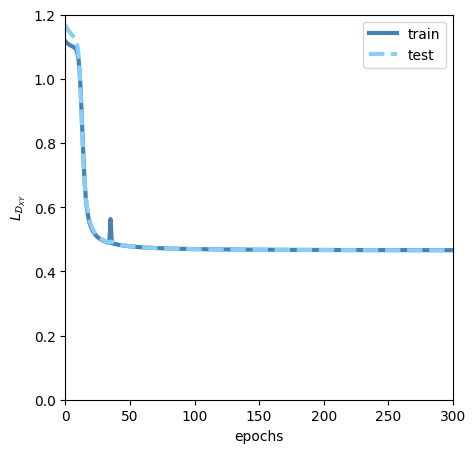

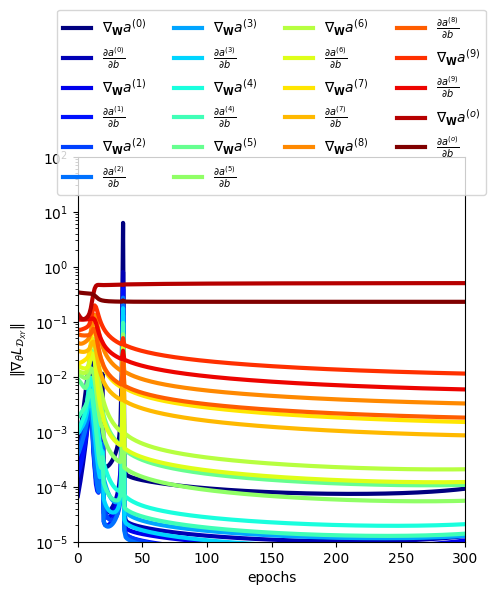

In [ ]:
# Chapter 7 - Example 19
# Source:
# https://machinelearningmastery.com/building-a-multiclass-classification-model-in-pytorch/
# https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import copy
# install torchviz (optional)
# ! pip install torchviz
# from torchviz import make_dot

# To assure reproductibility, fix the random seed
torch.manual_seed(0) # to assure reproductibility
np.random.seed(0) # to assure reproductibility

# Download and parse the IRIS dataset (from the UCI Machine Learning repository)
# This dataset was conceived by Sir Ronald Fisher and it is among the best-known
# dataset for pattern recognition
data_url= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
data = pd.read_csv(data_url, header=None)
X = data.iloc[:, 0:4]
y = data.iloc[:, 4:]

# The IRIS dataset is composed of the three class labels:
# 1. Iris-setosa
# 2. Iris-versicolor
# 3. Iris-virginica
# apply one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
y = ohe.transform(y)

# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
d_X = X.shape[1]
Ny = y.shape[-1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Function to track grad norm
def track_grad_norm(model, norm_type='fro'):
  # Collect parameters (weights and biases from all layers)
  parameters = [p for p in model.parameters()
                if p.grad is not None and p.requires_grad]
  # Defin the total norm and initialize to 0
  total_norm = {k: 0.0 for k,_ in model.named_parameters()}
  if len(parameters) > 0:
      # get weight device (initial weight)
      device = parameters[0].grad.device
      # Assign values of the grad to each layer (in the dictionary)
      for n,p in model.named_parameters():
        total_norm[n]=torch.norm(p.grad.detach(), norm_type).to(device).item()
  return total_norm

loss_fn = nn.CrossEntropyLoss() # loss function

# Design the MLP
h_theta = nn.Sequential()
nl = 10 # number of hidden layers
fan_in = 5 # number of hidden units per neuron
# Define the dictionary of different activation functions
activations={'tanh': nn.Tanh(), 'ReLU': nn.ReLU(), 'Sigmoid': nn.Sigmoid() }

# chosen activation function
act = 'tanh' # switch to ReLU or Sigmoid
activation = activations[act]
# Initialize latex dictionary for plotting
latex_dict={}
# Iterate over layer number
for l in range(nl):
  if l==0:
    h_theta.add_module('a{:>d}'.format(l), nn.Linear(d_X, fan_in))
  else:
    h_theta.add_module('a{:>d}'.format(l), nn.Linear(fan_in, fan_in))

  h_theta.add_module('g{:>d}'.format(l), activation)
  # Update the latex dictionary for plotting
  latex_dict["a{:>d}.weight".format(l)]=r"$\nabla_{{ \mathbf{{W}} }} a^{{({:>d})}}$".format(l)
  latex_dict["a{:>d}.bias".format(l)]=r"$\frac{{\partial a^{{({:>d})}}}}{{\partial b}}$".format(l)
# define output layer
h_theta.add_module('aout', nn.Linear(fan_in, Ny))
# Update the latex dictionary for plotting
latex_dict['aout.weight'.format(l)]=r"$\nabla_{{ \mathbf{{W}} }} a^{{(o)}}$"
latex_dict['aout.bias'.format(l)]=r"$\frac{{\partial a^{{(o)}}}}{{\partial b}}$"

# Initialize weights
# h_theta.apply(kaiming_normal_init)
init_weight=False

optimizer = optim.Adam(h_theta.parameters(), lr=0.001) # optimizer


# prepare model and training parameters
n_epochs = 300 # number of training epochs
batch_size = 5 # size of the mini batch
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
# track loss history
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []
norm_grad={n:[] for n,_ in h_theta.named_parameters()}


# # Initialize weights
# h_theta.apply(xavier_normal_init)
# training loop over the epochs
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    epoch_norm_grad = {n:[] for n,_ in h_theta.named_parameters()}
    # set model in training mode
    h_theta.train()

    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred = h_theta(X_batch)
            # compute the loss
            loss = loss_fn(y_pred, y_batch)
            # reset previously saved gradients and empty the optimizer memory
            optimizer.zero_grad()
            # run backward propagation
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
            # Update the norm of the grad per sample
            update_grad_norm_batch = track_grad_norm(h_theta)
            for p,ng in update_grad_norm_batch.items():
              epoch_norm_grad[p].append(ng)
    # Compute the mean norm of the grad
    for p,ng in epoch_norm_grad.items():
      norm_grad[p].append(np.mean(ng))
    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta.eval()
    # infer the class over the test set
    y_pred = h_theta(X_test)
    ce = loss_fn(y_pred, y_test)

    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    # norm_grad.append(np.mean(epoch_norm_grad))
    # if acc > best_acc:
    #     best_acc = acc
    #     best_weights = copy.deepcopy(h_theta.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Plot the loss for train and test sets
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(train_loss_hist, label="train",color='steelblue',linewidth=3)
ax.plot(test_loss_hist, label="test",color='lightskyblue',linewidth=3,linestyle='--')
ax.set_xlabel(r"epochs")
ax.set_ylabel(r"$\mathit{L}_{\mathcal{D}_{XY}}$")
ax.set_xlim(0,300)
ax.set_ylim(0.0,1.2)
ax.legend()

if init_weight:
  fig.savefig("loss_classifier_init_{:>d}_{:>d}_{:>s}.png".format(nl, fan_in, act),
              dpi=300, bbox_inches="tight")
else:
  fig.savefig("loss_classifier_{:>d}_{:>d}_{:>s}.png".format(nl, fan_in, act),
              dpi=300, bbox_inches="tight")

# Plot the mean gradient norm
colors = [plt.cm.jet(c) for c in  np.linspace(0,1,len(list(norm_grad.keys())))  ]

fig, ax = plt.subplots(figsize=(5,5))
for i, (n, ng) in enumerate(norm_grad.items()):
  ax.semilogy(ng, label=latex_dict[n],color=colors[i],linewidth=3)
# ax.plot(test_loss_hist, label="test")
ax.set_xlabel("epochs")
ax.set_ylabel(r"$\Vert \nabla_\theta \mathit{L}_{\mathcal{D}_{XY}}\Vert$")
ax.set_xlim(0,300)
ax.set_ylim(1e-5,1e2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),ncol=4,)
if init_weight:
  fig.savefig("norm_grad_classifier_init_{:>d}_{:>d}_{:>s}.png".format(nl, fan_in, act),
              dpi=300, bbox_inches="tight")
else:
  fig.savefig("norm_grad_classifier_{:>d}_{:>d}_{:>s}.png".format(nl, fan_in, act),
              dpi=300, bbox_inches="tight")

# Chapter 7 - Example 20

In [ ]:
# Chapter 7 - Example 20
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import pandas as pd
import torch
import torch.nn as nn

# To assure reproductibility, fix the random seed
torch.manual_seed(0) # to assure reproductibility

# define the 1-layer MLP
h_theta = nn.Sequential()
h_theta.add_module('a1', nn.Linear(100, 100))
h_theta.add_module('g1', nn.ReLU())

# define initialization functions
def constant_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.constant_(m.weight, 2)

def uniform_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.uniform_(m.weight,a=-0.5, b=0.5)

def normal_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight)

def xavier_uniform_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)

def xavier_normal_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)

def kaiming_uniform_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_uniform_(m.weight)

def kaiming_normal_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight)


# Applying different initializations to model

# constant
h_theta.apply(constant_init)
constant_weights = [m.weight.flatten() for m in h_theta.modules() if type(m)==nn.Linear]
constant_weights = torch.concatenate(constant_weights).detach().cpu().numpy()

# uniform
h_theta.apply(uniform_init)
uniform_weights = [m.weight.flatten() for m in h_theta.modules() if type(m)==nn.Linear]
uniform_weights = torch.concatenate(uniform_weights).detach().cpu().numpy()

# normal
h_theta.apply(normal_init)
normal_weights = [m.weight.flatten() for m in h_theta.modules() if type(m)==nn.Linear]
normal_weights = torch.concatenate(normal_weights).detach().cpu().numpy()

# xavier uniform
h_theta.apply(xavier_uniform_init)
xavier_uniform_weights = [m.weight.flatten() for m in h_theta.modules() if type(m)==nn.Linear]
xavier_uniform_weights = torch.concatenate(xavier_uniform_weights).detach().cpu().numpy()

# xavier normal
h_theta.apply(xavier_normal_init)
xavier_normal_weights = [m.weight.flatten() for m in h_theta.modules() if type(m)==nn.Linear]
xavier_normal_weights = torch.concatenate(xavier_normal_weights).detach().cpu().numpy()

# kaiming uniform
h_theta.apply(kaiming_uniform_init)
kaiming_uniform_weights = [m.weight.flatten() for m in h_theta.modules() if type(m)==nn.Linear]
kaiming_uniform_weights = torch.concatenate(kaiming_uniform_weights).detach().cpu().numpy()

# kaiming normal
h_theta.apply(kaiming_normal_init)
kaiming_normal_weights = [m.weight.flatten() for m in h_theta.modules() if type(m)==nn.Linear]
kaiming_normal_weights = torch.concatenate(kaiming_normal_weights).detach().cpu().numpy()

weights = {"uniform": uniform_weights,
           "normal": normal_weights,
           "Xavier uniform": xavier_uniform_weights,
           "Xavier normal": xavier_normal_weights,
           "Kaiming uniform": kaiming_uniform_weights,
           "Kaiming normal": kaiming_normal_weights}

# plot histograms
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

ax=ax.flatten()

for a, (k,v) in enumerate(weights.items()):
  # compute histogram
  counts, bins = np.histogram(v, bins=v.size//10)
  ax[a].hist(bins[:-1], bins, weights=counts,
    align='left', color='k', density=True,
    log=True)
  ax[a].set_title(k)
  if a>2:
    ax[a].set_xlabel(r"$W_{ij}$")
  if a==0 or a==3:
    ax[a].set_ylabel("#")
  ax[a].set_xlim(-3.0,3.0)
  ax[a].set_ylim(0,5.0)
fig.savefig("weight_initialization.png",dpi=300,bbox_inches='tight')